# Computer Vision Masterclass - Face recognition

## OpenCV

### Loading the dataset

- Yale faces database: http://vision.ucsd.edu/content/yale-face-database

In [ ]:
from PIL import Image
import cv2
import numpy as np
import zipfile
from google.colab.patches import cv2_imshow
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn

In [ ]:
path = 'yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

### Pre-processing the images

In [ ]:
print(os.listdir('yalefaces/train'))

['subject01.leftlight.gif', 'subject03.centerlight.gif', 'subject13.happy.gif', 'subject08.wink.gif', 'subject03.wink.gif', 'subject12.sleepy.gif', 'subject11.sad.gif', 'subject08.happy.gif', 'subject09.glasses.gif', 'subject11.surprised.gif', 'subject04.wink.gif', 'subject02.surprised.gif', 'subject12.sad.gif', 'subject04.sad.gif', 'subject15.centerlight.gif', 'subject02.happy.gif', 'subject01.wink.gif', 'subject14.sleepy.gif', 'subject14.rightlight.gif', 'subject08.noglasses.gif', 'subject01.sad.gif', 'subject03.sad.gif', 'subject12.happy.gif', 'subject02.glasses.gif', 'subject03.surprised.gif', 'subject02.normal.gif', 'subject12.glasses.gif', 'subject08.surprised.gif', 'subject10.sleepy.gif', 'subject06.noglasses.gif', 'subject06.surprised.gif', 'subject13.leftlight.gif', 'subject13.surprised.gif', 'subject10.glasses.gif', 'subject03.noglasses.gif', 'subject10.happy.gif', 'subject15.surprised.gif', 'subject01.surprised.gif', 'subject03.normal.gif', 'subject08.glasses.gif', 'subject1

In [ ]:
def get_image_data():
  paths = [os.path.join('yalefaces/train', f) for f in os.listdir('yalefaces/train')]
  faces = [] # pixels of image
  ids = [] # subject numbers

  for path in paths:
    image = Image.open(path).convert('L') # 'L': conver gif to image
    image_np = np.array(image, 'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [ ]:
ids, faces = get_image_data()

### Training the LBPH classifier

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

### Recognizing faces

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

In [ ]:
test_image = 'yalefaces/test/subject10.sad.gif'

In [ ]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
image_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [ ]:
image_np.shape

(243, 320)

In [ ]:
prediction = lbph_face_classifier.predict(image_np)
prediction
# prediction[0]: class
# prediction[1]: confidence(the higher value, the higher prediction)

(10, 6.384336446373091)

In [ ]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))
expected_output

10

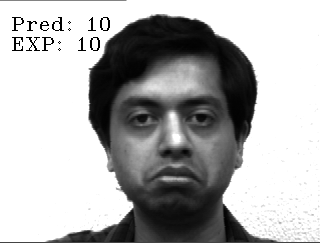

In [ ]:
cv2.putText(image_np, 'Pred: '+str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(image_np, 'EXP: '+str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_imshow(image_np)

In [ ]:
paths = [os.path.join('yalefaces/test', f) for f in os.listdir('yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
  predictions.append(prediction)
  expected_outputs.append(expected_output)
  
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

print(predictions)
print(expected_outputs)

[13  5  4  9  3 12  5 13  6 14 15  4  7  9 14  4  1  4  8  9 11 12  5 14
  9 11 10  7  7  1]
[13  5  8  7  3 12  5 13  6  6 15  2  9  9 14 10  1  4  8  3 11 12  2 14
  4 11 10 15  7  1]


### Evaluating the face classifier

In [ ]:
accuracy_score(expected_outputs, predictions)

0.6666666666666666

In [ ]:
cm = confusion_matrix(expected_outputs, predictions)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

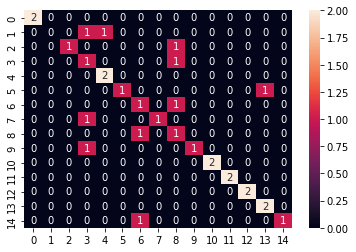

In [ ]:
seaborn.heatmap(cm, annot=True);